### Road image file

In [36]:
import os
import cv2
import matplotlib.pyplot as plt 

In [37]:
IMAGE_FORMAT = ["jpeng", "jpg", "png"]

def list_image_files(data_dir, sub_dir):
    image_files = []
    images_dir = os.path.join(data_dir, sub_dir)
    for file_path in os.listdir(images_dir):
        if file_path.split(".")[-1] in IMAGE_FORMAT:
            image_files.append(os.path.join(sub_dir, file_path))
    return image_files

In [59]:
# Road image file path
train_data_dir = "./Covid19-dataset/train"
class_list = ["Normal", "Covid", "Viral Pneumonia"]

In [64]:
# function of set file
class Chest_dataset():
    def __init__(self, data_dir, transformer=None):
        self.data_dir = data_dir
        normal = list_image_files(data_dir, "Normal")
        covid = list_image_files(data_dir, "Covid")
        pneumonia = list_image_files(data_dir, "Viral Pneumonia")
        
        self.files_path = normal + covid + pneumonia
        self.transformer = transformer
        
    def __len__(self):
        return len(self.files_path)
    
    def __getitem__(self, index):
        image_file = os.path.join(self.data_dir, self.files_path[index])
        image = cv2.imread(image_file)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        class_name = self.files_path[index].split(os.sep)[0]
        class_id = class_list.index(class_name)
        
        if self.transformer:
            image = self.transformer(image)
            class_id = torch.Tensor([target]).long()
            
        return image, class_id

In [65]:
dset = Chest_dataset(data_dir=train_data_dir)

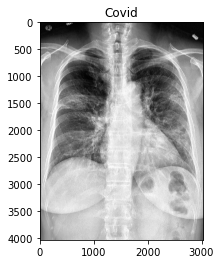

In [66]:
index = 0
image, target = dset[index]

plt.title(class_list[target])
plt.imshow(image)

In [67]:
len(dset)

65